# Gestão da Qualidade

## Gráficos de controle em Python

por **Cibele Russo** 

**ICMC/USP - São Carlos SP**


Considere que o aproveitamento em uma disciplina de Cálculo seja avaliado o número médio de erros cometidos por alunos em quatro provas. 

Foram registrados os números de erros de 30 alunos em quatro provas no primeiro semestre. Verificou-se que o número médio de erros estava muito alto,  então uma nova metodologia de ensino foi proposta e 30 alunos no segundo semestre foram avaliados, na mesma disciplina, e o número de erros em cada prova foi registrado. 


Suponha que as provas sejam diferentes mas tenham o mesmo grau de dificuldade, ou seja, que os números de erros reflitem a proficiência dos alunos.

Como descrever o aproveitamento da disciplina?
Como avaliar se o aproveitamento da disciplina melhorou?



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f

In [2]:
import pandas as pd
url='https://raw.githubusercontent.com/cibelerusso/Gestao-da-qualidade/main/Forma%C3%A7%C3%A3o%20continuada/Educacao.csv'
data = pd.read_csv(url, sep=",", decimal=',') # use sep="," for coma separation. 
data.describe()

,n_amostra,P1,P2,P3,P4,Média,Amplitude
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,8.016667,7.933333,7.000000,7.700000,7.688333,5.833333
std,17.464249,3.265078,3.024570,3.262525,3.729407,2.229471,2.894569
min,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000
25%,15.750000,6.000000,6.000000,5.000000,5.000000,6.000000,4.000000
50%,30.500000,8.000000,7.500000,6.000000,7.000000,7.800000,6.000000
75%,45.250000,10.000000,9.000000,9.000000,10.000000,9.300000,7.000000
max,60.000000,19.000000,19.000000,19.000000,16.000000,13.800000,15.000000


In [3]:
plt.rcParams["figure.figsize"]  = (12,6)

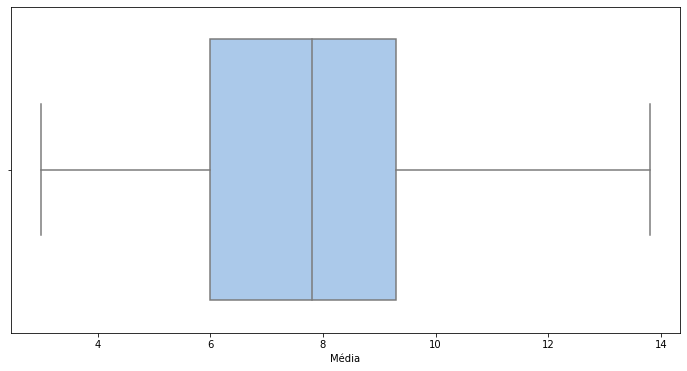

In [4]:
sns.boxplot(x = data['Média'], palette = 'pastel');

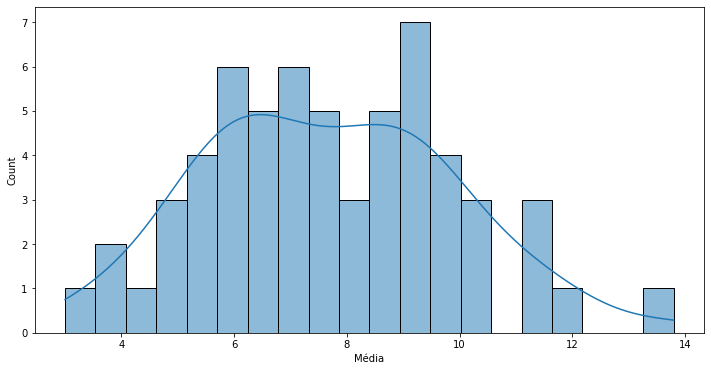

In [5]:
sns.histplot(data['Média'], bins=20, kde=True);

Separando primeiros 30 alunos e últimos 30 alunos

In [6]:
data1 = data.iloc[0:30,]
data1.head()

,n_amostra,P1,P2,P3,P4,Média,Amplitude
0,1,16,9,6,6,9.3,10.0
1,2,9,5,14,3,7.8,11.0
2,3,7,7,7,10,7.8,3.0
3,4,10,13,7,11,10.3,6.0
4,5,6,9,4,6,6.3,5.0


In [7]:
data2 = data.iloc[31:60,]
data2.head()

,n_amostra,P1,P2,P3,P4,Média,Amplitude
31,32,6,7,8,2,5.8,6.0
32,33,5,5,4,2,4.0,3.0
33,34,15,8,5,3,7.8,12.0
34,35,4,3,2,3,3.0,2.0
35,36,8,7,5,6,6.5,3.0


In [8]:
data1.describe()

,n_amostra,P1,P2,P3,P4,Média,Amplitude
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,9.266667,9.500000,8.633333,10.033333,9.386667,6.500000
std,8.803408,3.236999,2.979817,3.274597,3.232201,1.586524,3.181303
min,1.000000,4.000000,4.000000,4.000000,3.000000,6.300000,2.000000
25%,8.250000,7.000000,8.000000,6.250000,8.000000,8.575000,4.000000
50%,15.500000,9.000000,9.000000,8.500000,10.000000,9.300000,6.000000
75%,22.750000,11.000000,11.000000,10.000000,12.000000,10.225000,8.000000
max,30.000000,19.000000,19.000000,19.000000,16.000000,13.800000,15.000000


In [9]:
data2.describe()

,n_amostra,P1,P2,P3,P4,Média,Amplitude
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000
mean,46.000000,6.896552,6.137931,5.344828,5.241379,5.927586,5.00000
std,8.514693,2.781891,1.787339,2.364558,2.516448,1.250970,2.31455
min,32.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.00000
25%,39.000000,5.000000,5.000000,4.000000,3.000000,5.500000,3.00000
50%,46.000000,7.000000,6.000000,5.000000,5.000000,6.000000,5.00000
75%,53.000000,8.000000,7.000000,6.000000,7.000000,6.800000,6.00000
max,60.000000,15.000000,10.000000,11.000000,10.000000,8.800000,12.00000


In [11]:
data['Depois'] = 0
data['Depois'].iloc[31:60] = 1 
data.tail()

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,n_amostra,P1,P2,P3,P4,Média,Amplitude,Depois
55,56,8,9,3,10,7.5,7.0,1
56,57,4,4,9,2,4.8,7.0,1
57,58,10,6,4,7,6.8,6.0,1
58,59,6,7,2,9,6.0,7.0,1
59,60,2,7,3,3,3.8,5.0,1


In [12]:
data

,n_amostra,P1,P2,P3,P4,Média,Amplitude,Depois
0,1,16,9,6,6,9.3,10.0,0
1,2,9,5,14,3,7.8,11.0,0
2,3,7,7,7,10,7.8,3.0,0
3,4,10,13,7,11,10.3,6.0,0
4,5,6,9,4,6,6.3,5.0,0
5,6,7,8,10,12,9.3,5.0,0
6,7,10,9,12,11,10.5,3.0,0
7,8,10,9,8,11,9.5,3.0,0
8,9,11,11,9,16,11.8,7.0,0
9,10,6,14,10,11,10.3,8.0,0


<AxesSubplot:xlabel='Depois', ylabel='Média'>

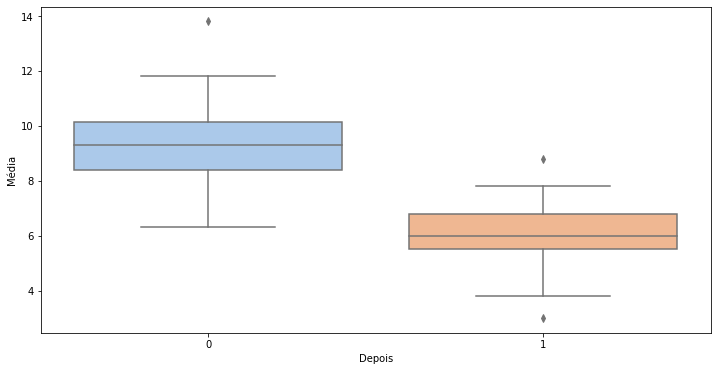

In [13]:
sns.boxplot(y = data['Média'], x = data['Depois'], palette = 'pastel')

<AxesSubplot:xlabel='Média', ylabel='Count'>

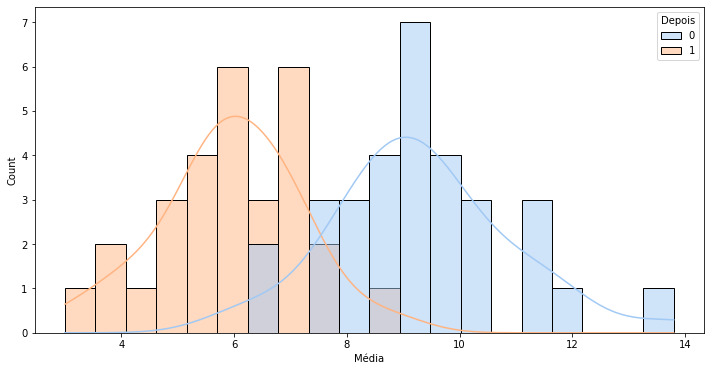

In [14]:
sns.histplot(x = data['Média'], hue = data['Depois'], bins=20, kde=True, palette = 'pastel')

In [15]:
import numpy as np
import GaugeRnR
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

In [16]:
# Fonte: https://www.kaggle.com/nalkrolu/statistical-process-control-quality-control/notebook#X-R-Control-Chart

class XR_ControlChart:
    
    def fit(self,data):
        
        self.sample_size = len(data[0])
        self.number_of_sample = len(data)
        self.X = np.zeros((self.number_of_sample,1))
        self.R = np.zeros((self.number_of_sample,1))

        for i in range(self.number_of_sample):
            self.X[i] = data[i].mean()
            self.R[i] = data[i].max() - data[i].min()
        
        self.data = data
        
    def ControlChart(self,A2,D3,D4):

        ucl_X   = self.X.mean() + A2*self.R.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - A2*self.R.mean()

        ucl_R   = D4*self.R.mean()
        cl_R    = self.R.mean() 
        lcl_R   = D3*self.R.mean()
        
        plt.figure(figsize=(15,5))
        plt.title("Boxplot for {} Observations\nSample Size {}".format(len(self.data),len(self.data[0])))
        plt.boxplot(self.data.T)
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.R,marker="o",color="k",label="R")
        plt.plot([ucl_R]*len(self.X),color="r",label="UCL={}".format(ucl_R.round(2)))
        plt.plot([cl_R]*len(self.X),color="b",label="CL={}".format(cl_R.round(2)))
        plt.plot([lcl_R]*len(self.X),color="r",label="LCL={}".format(lcl_R.round(2)))
        plt.title("R Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.R)
        plt.title("Boxplot R")
        plt.xlabel("R")
        plt.show()

In [17]:
data_controle = np.array(data[['P1','P2','P3','P4']])

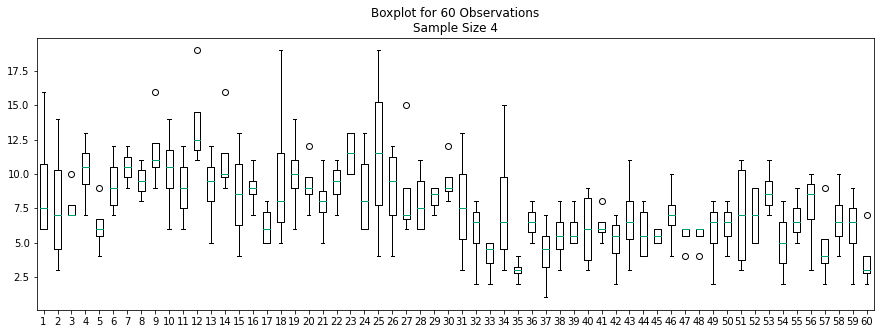

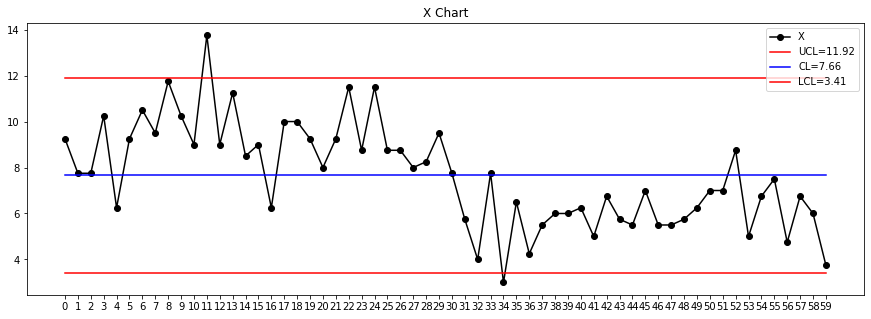

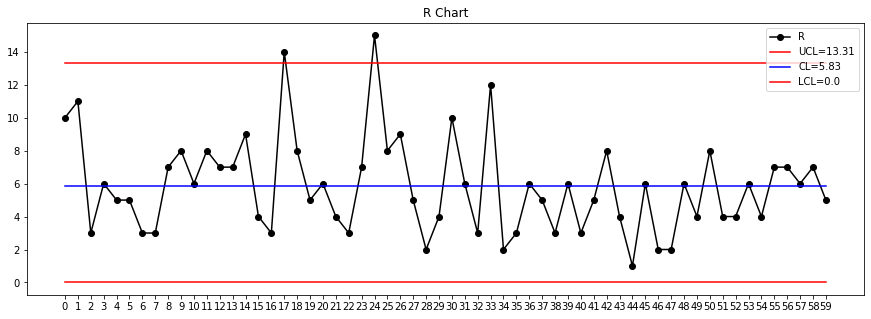

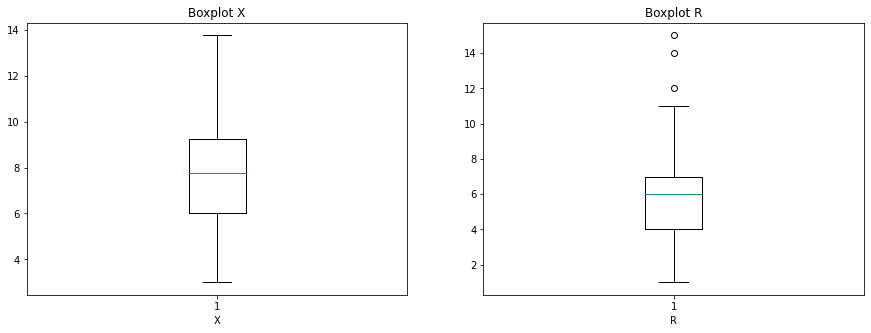

In [18]:
chart = XR_ControlChart()
chart.fit(data_controle)
chart.ControlChart(A2 = 0.729, D3 = 0 , D4 = 2.282)

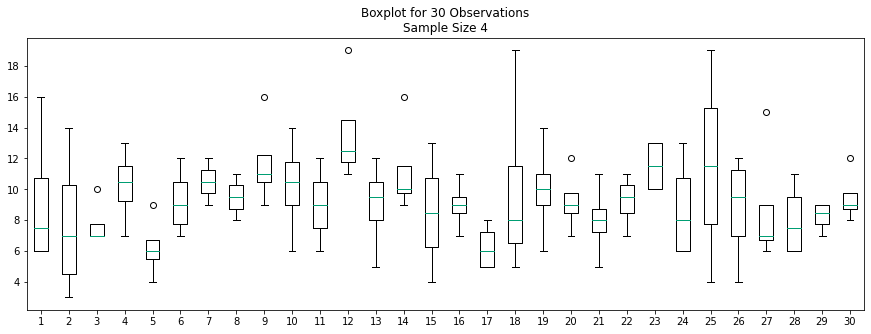

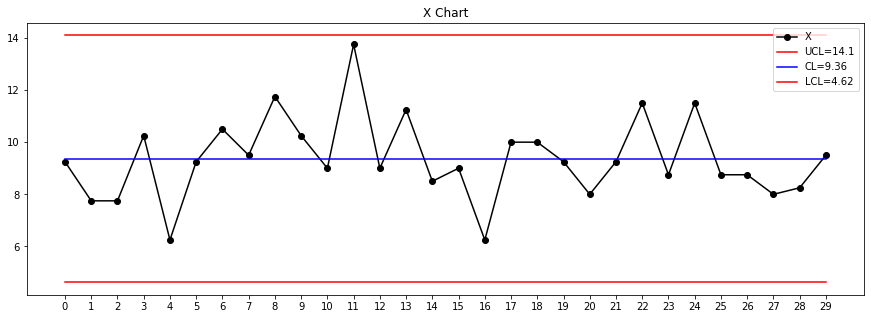

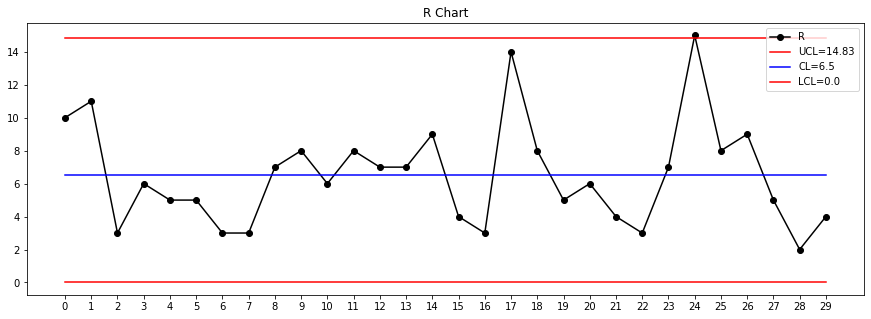

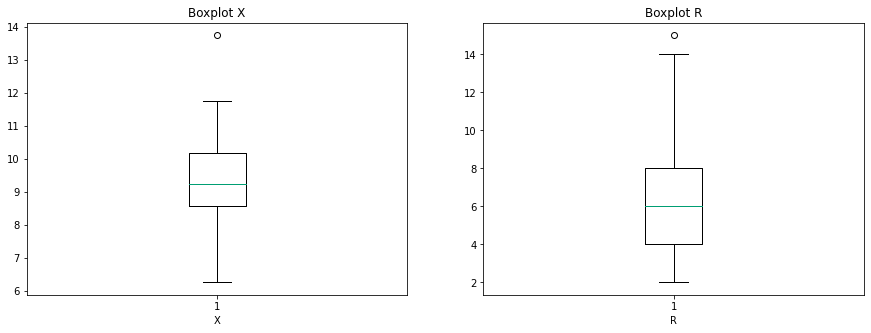

In [19]:
data1_controle = np.array(data1[['P1','P2','P3','P4']])
chart = XR_ControlChart()
chart.fit(data1_controle)
chart.ControlChart(A2 = 0.729,D3 = 0 ,D4 = 2.282)


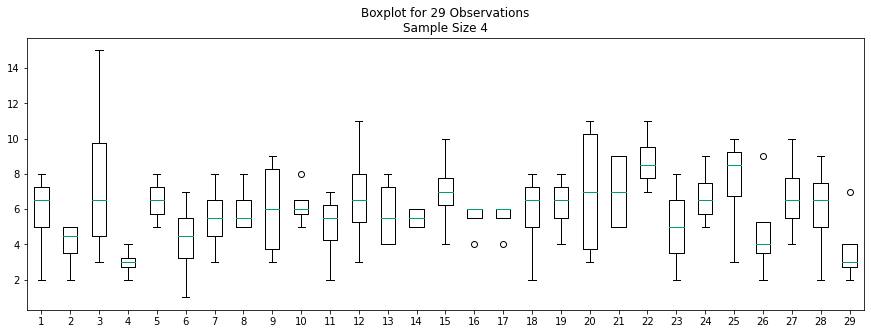

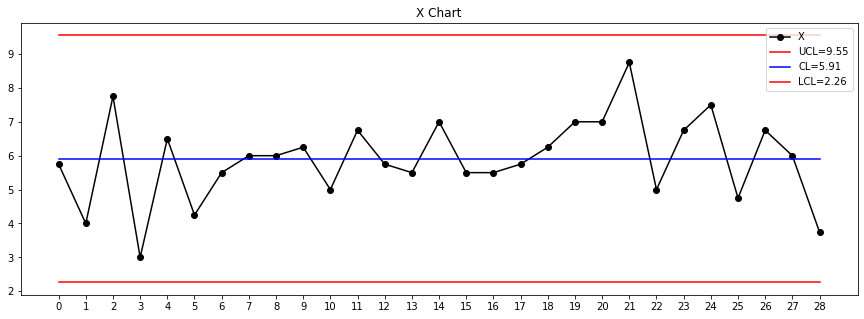

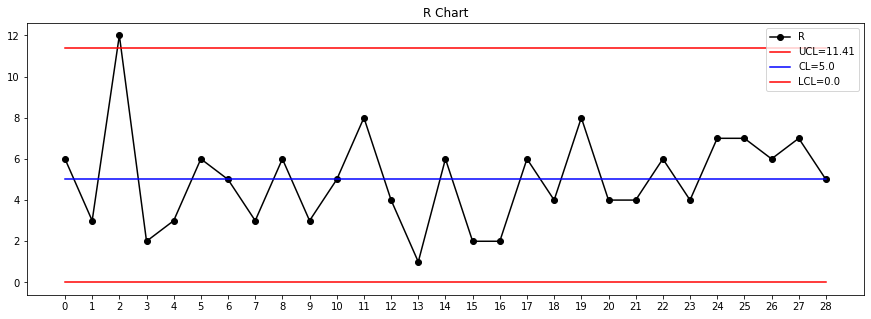

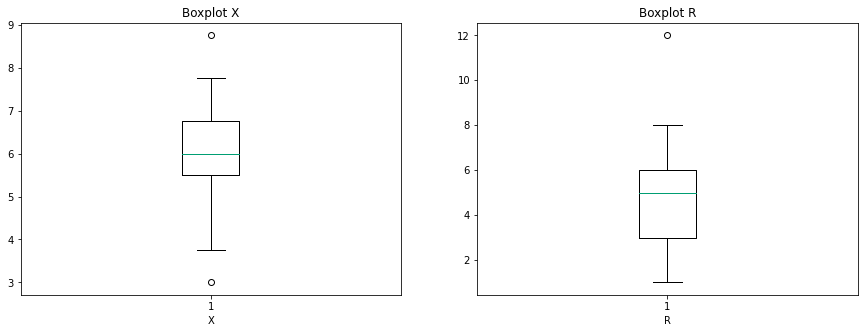

In [20]:
data2_controle = np.array(data2[['P1','P2','P3','P4']])
chart = XR_ControlChart()
chart.fit(data2_controle)
chart.ControlChart(A2 = 0.729,D3 = 0 ,D4 = 2.282)

**Exercício:**

Represente no mesmo gráfico todos os dados com os limites de controle de antes e depois.

Dica: Você pode usar como exemplo o que foi apresentado em https://www.youtube.com/watch?v=3WoX_s274JE

In [21]:
from scipy import stats

stats.ttest_ind(data1['Média'],data2['Média'])


Ttest_indResult(statistic=9.278694403855084, pvalue=5.431024386748059e-13)

In [22]:
stats.ttest_ind(data1['Média'],data2['Média'], equal_var=False)

Ttest_indResult(statistic=9.316093371146462, pvalue=6.844397713125599e-13)